# Holt-Winters Methods

In [18]:
import pandas as pd
import numpy as np
%matplotlib inline

In [19]:
df = pd.read_csv('../Data/airline_passengers.csv',index_col='Month',parse_dates=True)
df.dropna(inplace=True)
df

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


## Simple Exponential Smoothing

In [20]:
df.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq=None)

In [21]:
df.index.freq = "MS"
df.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq='MS')

'http://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#offset-aliases'

In [22]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

span = 12
alpha = 2 / (span + 1)

In [23]:
df["EWMA12"] = df["Thousands of Passengers"].ewm(alpha=alpha, adjust=False).mean()

In [24]:
model = SimpleExpSmoothing(df["Thousands of Passengers"])

In [25]:
fitted_model = model.fit(smoothing_level=alpha, optimized=False)

In [26]:
df["SES12"] = fitted_model.fittedvalues.shift(-1)

In [27]:
df

,Thousands of Passengers,EWMA12,SES12
Month,,,
1949-01-01,112,112.000000,112.000000
1949-02-01,118,112.923077,112.923077
1949-03-01,132,115.857988,115.857988
1949-04-01,129,117.879836,117.879836
1949-05-01,121,118.359861,118.359861
...,...,...,...
1960-08-01,606,494.898619,494.898619
1960-09-01,508,496.914216,496.914216
1960-10-01,461,491.388952,491.388952


## Double Exponential Smoothing

In [28]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [29]:
df["DES_add_12"] = ExponentialSmoothing(df["Thousands of Passengers"], trend="add").fit().fittedvalues.shift(-1)

In [30]:
df

,Thousands of Passengers,EWMA12,SES12,DES_add_12
Month,,,,
1949-01-01,112,112.000000,112.000000,114.102394
1949-02-01,118,112.923077,112.923077,120.040657
1949-03-01,132,115.857988,115.857988,134.001539
1949-04-01,129,117.879836,117.879836,131.085845
1949-05-01,121,118.359861,118.359861,123.110263
...,...,...,...,...
1960-08-01,606,494.898619,494.898619,608.168786
1960-09-01,508,496.914216,496.914216,510.571382
1960-10-01,461,491.388952,491.388952,463.313463


<AxesSubplot:xlabel='Month'>

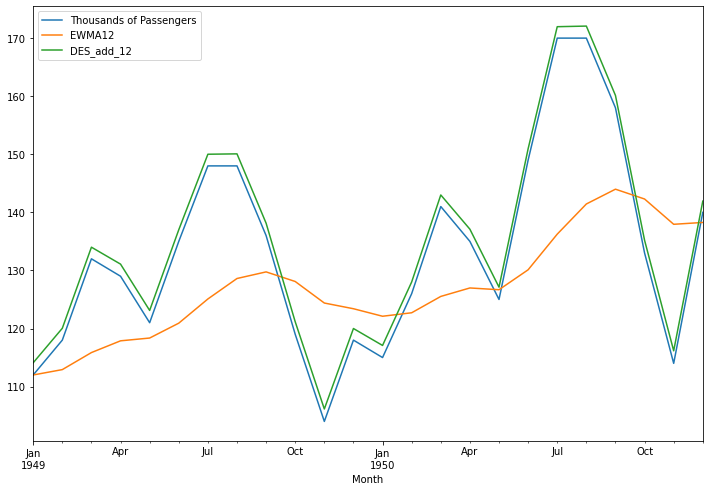

In [31]:
df[['Thousands of Passengers','EWMA12','DES_add_12']].iloc[:24].plot(figsize=(12,8))

In [32]:
df["DES_mul_12"] = ExponentialSmoothing(df["Thousands of Passengers"], trend="mul").fit().fittedvalues.shift(-1)
df

,Thousands of Passengers,EWMA12,SES12,DES_add_12,DES_mul_12
Month,,,,,
1949-01-01,112,112.000000,112.000000,114.102394,113.990701
1949-02-01,118,112.923077,112.923077,120.040657,120.031669
1949-03-01,132,115.857988,115.857988,134.001539,134.235979
1949-04-01,129,117.879836,117.879836,131.085845,131.270786
1949-05-01,121,118.359861,118.359861,123.110263,123.156267
...,...,...,...,...,...
1960-08-01,606,494.898619,494.898619,608.168786,616.673652
1960-09-01,508,496.914216,496.914216,510.571382,517.378618
1960-10-01,461,491.388952,491.388952,463.313463,469.290950


<AxesSubplot:xlabel='Month'>

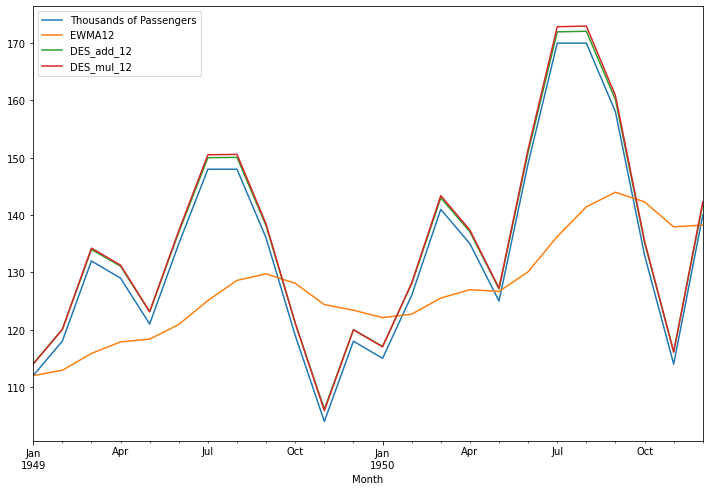

In [33]:
df[['Thousands of Passengers','EWMA12','DES_add_12',"DES_mul_12"]].iloc[:24].plot(figsize=(12,8))

## Triple Exponential Smoothing

In [35]:
df["TESadd12"] = ExponentialSmoothing(df["Thousands of Passengers"],trend="add", seasonal="add", seasonal_periods=12).fit().fittedvalues
df.head()

,Thousands of Passengers,EWMA12,SES12,DES_add_12,DES_mul_12,TESadd12
Month,,,,,,
1949-01-01,112,112.000000,112.000000,114.102394,113.990701,111.959998
1949-02-01,118,112.923077,112.923077,120.040657,120.031669,120.193337
1949-03-01,132,115.857988,115.857988,134.001539,134.235979,134.676835
1949-04-01,129,117.879836,117.879836,131.085845,131.270786,131.407263
1949-05-01,121,118.359861,118.359861,123.110263,123.156267,124.643743


In [36]:
df["TESmul12"] = ExponentialSmoothing(df["Thousands of Passengers"],trend="mul", seasonal="mul", seasonal_periods=12).fit().fittedvalues
df

c:\Users\mbatu\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\holtwinters\model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


,Thousands of Passengers,EWMA12,SES12,DES_add_12,DES_mul_12,TESadd12,TESmul12
Month,,,,,,,
1949-01-01,112,112.000000,112.000000,114.102394,113.990701,111.959998,111.595648
1949-02-01,118,112.923077,112.923077,120.040657,120.031669,120.193337,118.842606
1949-03-01,132,115.857988,115.857988,134.001539,134.235979,134.676835,133.333853
1949-04-01,129,117.879836,117.879836,131.085845,131.270786,131.407263,127.899963
1949-05-01,121,118.359861,118.359861,123.110263,123.156267,124.643743,120.979016
...,...,...,...,...,...,...,...
1960-08-01,606,494.898619,494.898619,608.168786,616.673652,608.231973,629.400753
1960-09-01,508,496.914216,496.914216,510.571382,517.378618,507.656792,511.999934
1960-10-01,461,491.388952,491.388952,463.313463,469.290950,451.325360,448.034716


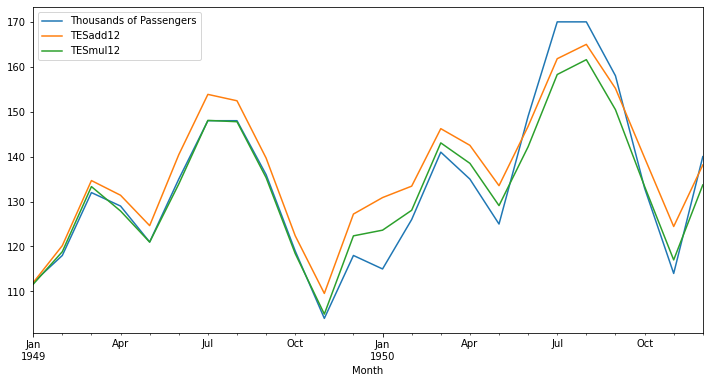

In [47]:
df[['Thousands of Passengers','TESadd12','TESmul12']].iloc[:24].plot(figsize=(12,6)).autoscale(axis='x',tight=True);

<AxesSubplot:xlabel='Month'>

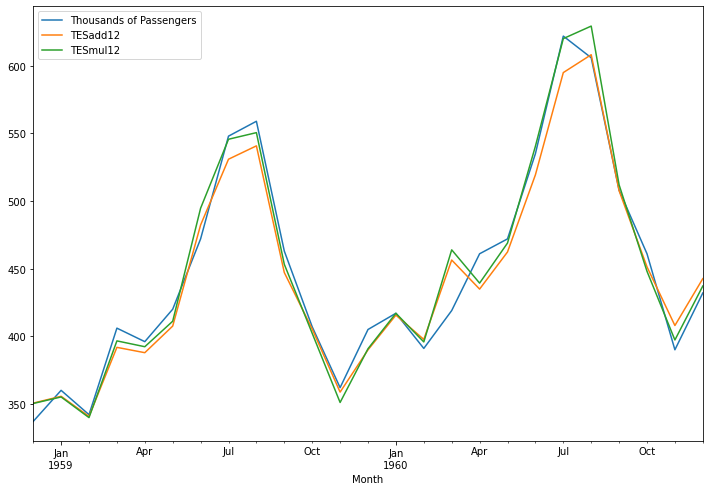

In [39]:
df[['Thousands of Passengers','TESadd12','TESmul12']].iloc[-25:].plot(figsize=(12,8))

<AxesSubplot:xlabel='Month'>

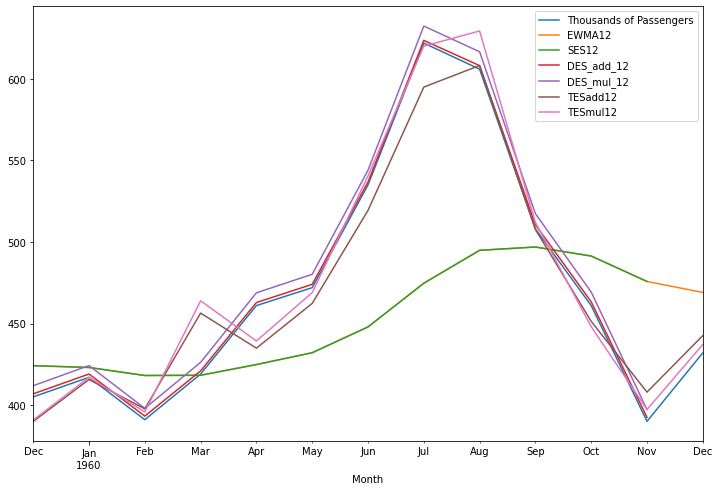

In [46]:
df[-13:].plot(figsize=(12,8))